In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
datas = pd.read_csv('cs-training.csv')
datas.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
datas.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
datas.isnull().any()

Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [6]:
datas.dropna(axis=0, inplace=True)

In [7]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            120269 non-null  int64  
 1   SeriousDlqin2yrs                      120269 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 3   age                                   120269 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 5   DebtRatio                             120269 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 8   NumberOfTimes90DaysLate               120269 non-null  int64  
 9   NumberRealEstateLoansOrLines          120269 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 11  

In [8]:
datas.drop(columns='Unnamed: 0', inplace=True)

In [9]:
datas.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
x = datas.values[:,1:]
print(x.shape)
y = datas.values[:,0]
print(y.shape)

(120269, 10)
(120269,)


In [11]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [12]:
# PCA 降维
model_pca = PCA(n_components=3)
x = model_pca.fit_transform(x)

In [13]:
warnings.filterwarnings('ignore')
LR = LogisticRegression(max_iter=2000)
SVM = SVC(kernel='linear', max_iter=2000)
DR = DecisionTreeClassifier()
LR_f1 = cross_val_score(LR, x, y, scoring='f1', cv=10)
DR_f1 = cross_val_score(DR, x, y, scoring='f1', cv=10)
SVM_f1 = cross_val_score(SVM, x, y, scoring='f1', cv=10)

In [14]:
print('LR_F1:', np.mean(LR_f1))
print('DR_F1:', np.mean(DR_f1))
print('SVM_F1:', np.mean(SVM_f1))

LR_F1: 0.01973589677135073
DR_F1: 0.23107725045304078
SVM_F1: 0.0778088702486266


In [15]:
max_Depth = []
for i in range(10):
    DR = DecisionTreeClassifier(max_depth=i)
    max_Depth.append(cross_val_score(DR, x, y).mean())
    print('max_depth:', (i,cross_val_score(DR, x, y).mean()))


max_depth: (0, nan)
max_depth: (1, 0.9305140976836818)
max_depth: (2, 0.9318111989538803)
max_depth: (3, 0.9330916526522207)
max_depth: (4, 0.9331332240509548)
max_depth: (5, 0.9329752472048964)
max_depth: (6, 0.9326925502860876)
max_depth: (7, 0.9325511975056913)
max_depth: (8, 0.9319774835117777)
max_depth: (9, 0.9314120858716871)


In [16]:
max_Depth = np.array(max_Depth)
depth_mean = np.nanmean(max_Depth)
print(depth_mean)
max_Depth[0] = depth_mean
# 返回array中最大值所在的索引 list:index(max(x))
print(np.argmax(max_Depth))

0.9322370880513202
4


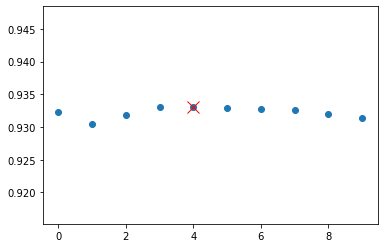

In [17]:
X_zhou = np.arange(0,10)
plt.figure(figsize=(6,4))
plt.scatter(X_zhou, max_Depth)
plt.plot(4, max_Depth.max(),'rx',markersize = 12)


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)
model = DecisionTreeClassifier(max_depth=4)
model = model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(predictions)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 1. 0.]


In [36]:

print('精确率为:{}'.format(precision_score(Y_test, predictions, average = 'micro')))
print('准确率为:{}'.format(accuracy_score(Y_test, predictions)))
print('召回率为:{}'.format(recall_score(Y_test, predictions)))
print(classification_report(predictions,Y_test))

精确率为:0.932263518195172
准确率为:0.932263518195172
召回率为:0.18127490039840638
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     35237
         1.0       0.18      0.54      0.27       844

    accuracy                           0.93     36081
   macro avg       0.58      0.74      0.62     36081
weighted avg       0.97      0.93      0.95     36081



In [37]:
test_datas = pd.read_csv('cs-test.csv')

In [38]:
test_datas.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [39]:
test_datas.drop(columns=['Unnamed: 0','SeriousDlqin2yrs'], inplace=True )

In [40]:
test_datas.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [41]:
test_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         81400 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    98877 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


In [42]:
test_datas.isnull().any()

RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [43]:
test_datas.dropna(axis=0, inplace=True)

In [44]:
test_datas.isna().any()

RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

In [45]:
test_datas

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101495,0.718874,35,1,0.308047,4125.0,8,0,0,1,2.0
101497,0.045230,67,0,0.012198,5000.0,4,0,0,0,0.0
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0


In [49]:
x_test = test_datas.values[:,:]
x_test = StandardScaler().fit_transform(x_test)
x_test = model_pca.fit_transform(x_test)

print(x_test.shape)
print(y.shape)
print(y[0:x_test.shape[0]].shape)

(81400, 3)
(120269,)
(81400,)


In [50]:
result_pre = model.predict(x_test)

In [51]:
result_pre

array([0., 0., 0., ..., 0., 0., 0.])